### Import necessary libraries  

In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob

# Analyse .tif files

### Visualize the RGB channels of the image

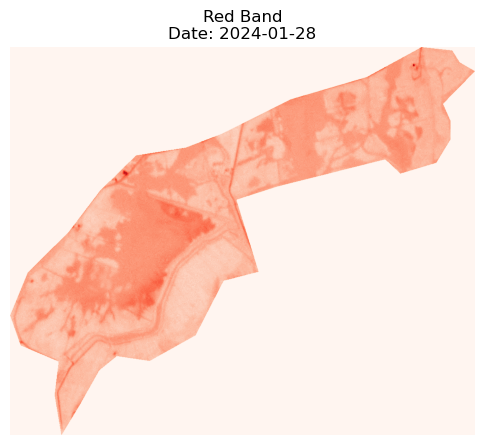

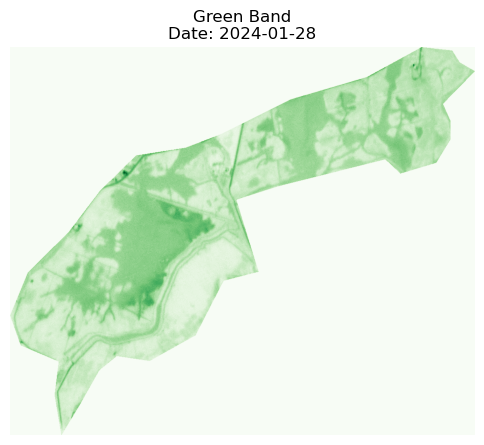

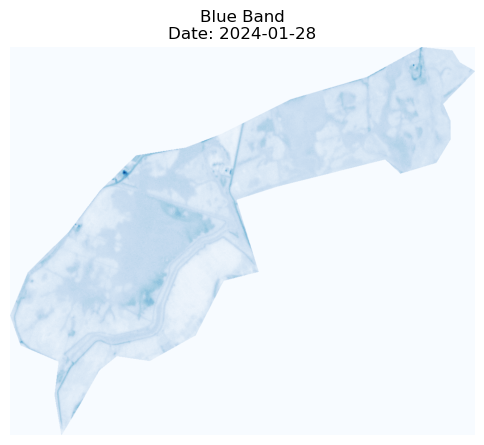

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..2144].


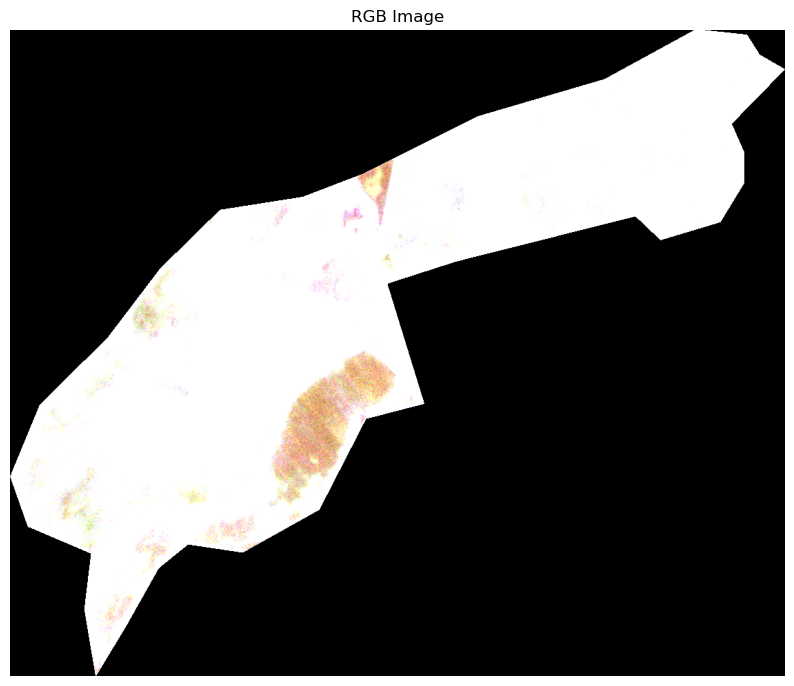

In [5]:
# Path to your .tif file
tif_file = r'..\..\data\planet_data\20240128_103834_83_248c_3B_AnalyticMS_SR_harmonized_clip.tif'


# Open the .tif file
with rasterio.open(tif_file) as src:
    # Read the Red (assuming band 1), Green (assuming band 2), and Blue (assuming band 3) bands
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)

# Plot the Red band
plt.figure(figsize=(6, 6))
plt.imshow(red, cmap='Reds')
# Extract the date and time from the file name
date_time = os.path.basename(tif_file).split('_')[0]
year = date_time[:4]
month = date_time[4:6]
day = date_time[6:8]

# Add the date and time as the title
plt.title(f'Red Band\nDate: {year}-{month}-{day}')
plt.axis('off')
plt.show()

# Plot the Green band
plt.figure(figsize=(6, 6))
plt.imshow(green, cmap='Greens')
date_time = os.path.basename(tif_file).split('_')[0]
year = date_time[:4]
month = date_time[4:6]
day = date_time[6:8]
plt.title(f'Green Band\nDate: {year}-{month}-{day}')
plt.axis('off')
plt.show()

# Plot the Blue band
plt.figure(figsize=(6, 6))
plt.imshow(blue, cmap='Blues')
date_time = os.path.basename(tif_file).split('_')[0]
year = date_time[:4]
month = date_time[4:6]
day = date_time[6:8]
plt.title(f'Blue Band\nDate: {year}-{month}-{day}')
plt.axis('off')
plt.show()

# Stack the RGB bands into a single array for the composite image
rgb = np.dstack((red, green, blue))

# Plot the RGB composite image
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()



### Print metadata of the image

In [6]:
# Paths to your .tif files
analytics_tif = r'..\..\data\planet_data\20240128_103834_83_248c_3B_AnalyticMS_SR_harmonized_clip.tif'
udm2_tif = r'..\..\data\planet_data\20240128_103834_83_248c_3B_udm2_clip.tif'

# Function to inspect and print metadata of a .tif file
def inspect_tif_file(tif_path, file_label):
    with rasterio.open(tif_path) as src:
        meta = src.meta
        print(f"\n{file_label} Metadata:")
        print(meta)
        print(f"Number of Bands: {src.count}")
        for i in range(1, src.count + 1):
            band = src.read(i)
            print(f"Band {i}: min={band.min()}, max={band.max()}")

# Inspect the AnalyticsMS_metadata_clip.tif file
inspect_tif_file(analytics_tif, "AnalyticsMS_metadata_clip.tif")

# Inspect the udm2_clip.tif file
inspect_tif_file(udm2_tif, "udm2_clip.tif")

# Based on common PlanetScope band designations:
# Band 1: Blue, Band 2: Green, Band 3: Red, Band 4: NIR
with rasterio.open(analytics_tif) as src:
    blue_band = src.read(1)
    green_band = src.read(2)
    red_band = src.read(3)
    if src.count > 3:
        nir_band = src.read(4)
    else:
        nir_band = None

print("\nBand Assignments based on common designations:")
print("Blue Band: Band 1")
print("Green Band: Band 2")
print("Red Band: Band 3")
print("NIR Band: Band 4 (if available)")

# Print min and max values for each band
print("\nMin and Max values for each band in AnalyticsMS_metadata_clip.tif:")
print(f"Blue Band: min={blue_band.min()}, max={blue_band.max()}")
print(f"Green Band: min={green_band.min()}, max={green_band.max()}")
print(f"Red Band: min={red_band.min()}, max={red_band.max()}")
if nir_band is not None:
    print(f"NIR Band: min={nir_band.min()}, max={nir_band.max()}")
else:
    print("NIR Band: Not available")



AnalyticsMS_metadata_clip.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1124, 'height': 937, 'count': 4, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 625401.0,
       0.0, -3.0, 5740218.0)}
Number of Bands: 4
Band 1: min=0, max=1201
Band 2: min=0, max=1434
Band 3: min=0, max=2144
Band 4: min=0, max=3773

udm2_clip.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1124, 'height': 937, 'count': 8, 'crs': CRS.from_epsg(32631), 'transform': Affine(3.0, 0.0, 625401.0,
       0.0, -3.0, 5740218.0)}
Number of Bands: 8
Band 1: min=0, max=1
Band 2: min=0, max=0
Band 3: min=0, max=0
Band 4: min=0, max=1
Band 5: min=0, max=0
Band 6: min=0, max=0
Band 7: min=0, max=91
Band 8: min=0, max=1

Band Assignments based on common designations:
Blue Band: Band 1
Green Band: Band 2
Red Band: Band 3
NIR Band: Band 4 (if available)

Min and Max values for each band in AnalyticsMS_metadata_clip.tif:
Blue Band: min=0, max=1201
Green Band: 

### Red band analysis

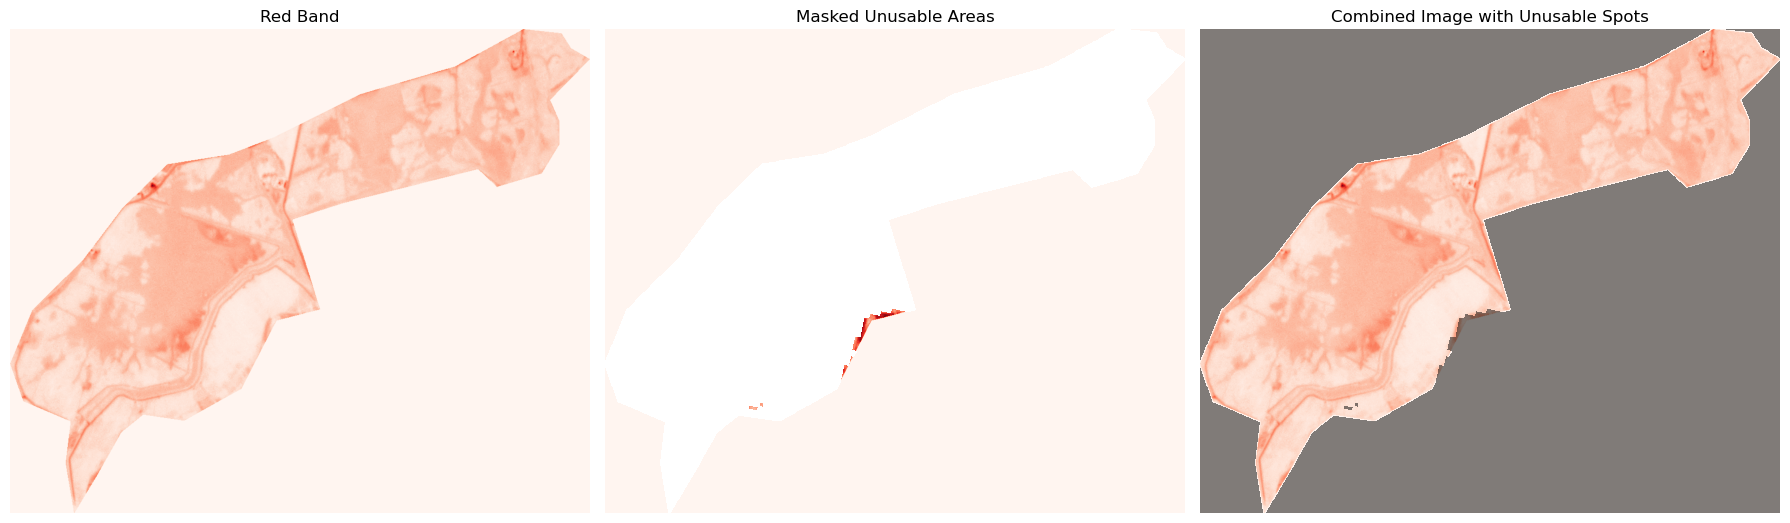

In [7]:
# Paths to your .tif files
analytics_tif = r'..\..\data\planet_data\20240128_103834_83_248c_3B_AnalyticMS_SR_harmonized_clip.tif'
udm2_tif = r'..\..\data\planet_data\20240128_103834_83_248c_3B_udm2_clip.tif'

# Read the Analytics file
with rasterio.open(analytics_tif) as src:
    red_band = src.read(3)  # Assuming band 3 is the Red band

# Read the UDM2 file (assumed to be a single band)
with rasterio.open(udm2_tif) as src:
    udm2_mask = src.read(1)

# Apply the UDM2 mask: set usable areas to NaN
masked_unusable = np.where(udm2_mask == 0, red_band, np.nan)

# Create a combined image showing unusable spots
combined_image = red_band.copy()
combined_image[udm2_mask == 0] = 0  # Mark unusable areas in the combined image

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subimage 1: Red band image
axes[0].imshow(red_band, cmap='Reds')
axes[0].set_title('Red Band')
axes[0].axis('off')

# Subimage 2: Masked unusable areas
axes[1].imshow(masked_unusable, cmap='Reds')
axes[1].set_title('Masked Unusable Areas')
axes[1].axis('off')

# Subimage 3: Combined image showing unusable spots
axes[2].imshow(red_band, cmap='Reds')
axes[2].imshow(np.ma.masked_where(udm2_mask != 0, udm2_mask), cmap='gray', alpha=0.5)
axes[2].set_title('Combined Image with Unusable Spots')
axes[2].axis('off')

# Show the figure
plt.tight_layout()
plt.show()


In [16]:
# Function to extract date parts from the date string
def format_date(date_str):
    year = date_str[:4]
    month = date_str[4:6]
    day = date_str[6:8]
    return f'{year}-{month}-{day}'

# Function to process and plot images for a given date
def process_images(analytics_tif, udm2_tif, output_folder):
    date = os.path.basename(analytics_tif).split('_')[0]

    # Check if both files exist
    if not os.path.exists(analytics_tif):
        print(f"Analytics file for date {date} not found at {analytics_tif}")
        return
    if not os.path.exists(udm2_tif):
        print(f"UDM2 file for date {date} not found at {udm2_tif}")
        return

    # Read the Analytics file
    with rasterio.open(analytics_tif) as src:
        red_band = src.read(3)  # Assuming band 3 is the Red band

    # Read the UDM2 file (assumed to be a single band)
    with rasterio.open(udm2_tif) as src:
        udm2_mask = src.read(1)

    # Apply the UDM2 mask: set usable areas to NaN
    masked_unusable = np.where(udm2_mask == 0, red_band, np.nan)

    # Create a combined image showing unusable spots
    combined_image = red_band.copy()
    combined_image[udm2_mask == 0] = 0  # Mark unusable areas in the combined image

    # Format the date for the title
    formatted_date = format_date(date)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Subimage 1: Red band image
    axes[0].imshow(red_band, cmap='Reds')
    axes[0].set_title(f'Red Band ({formatted_date})')
    axes[0].axis('off')

    # Subimage 2: Masked unusable areas
    axes[1].imshow(masked_unusable, cmap='Reds')
    axes[1].set_title(f'Masked Unusable Areas ({formatted_date})')
    axes[1].axis('off')

    # Subimage 3: Combined image showing unusable spots
    axes[2].imshow(red_band, cmap='Reds')
    axes[2].imshow(np.ma.masked_where(udm2_mask != 0, udm2_mask), cmap='gray', alpha=0.5)
    axes[2].set_title(f'Combined Image with Unusable Spots ({formatted_date})')
    axes[2].axis('off')

    # Save the figure
    plt.tight_layout()
    output_path = os.path.join(output_folder, f'{date}_output.png')
    plt.savefig(output_path)
    plt.close(fig)
    print(f"Saved output for date {date} to {output_path}")

    return output_path

# Folder containing the .tif files
folder_path = '../../data/planet_data/'

# Create the output folder if it doesn't exist
output_folder = '../../outputs/planet_data/ipynb_outputs/'
os.makedirs(output_folder, exist_ok=True)

# Get list of analytics files in the folder
analytics_files = glob.glob(os.path.join(folder_path, '*_3B_AnalyticMS_SR_harmonized_clip.tif'))

# List to store output paths for the GIF
output_paths = []

# Process images for each analytics file
for analytics_file in analytics_files:
    date_part = os.path.basename(analytics_file).split('_')[0]
    udm2_file_pattern = os.path.join(folder_path, f'{date_part}_*_3B_udm2_clip.tif')
    udm2_files = glob.glob(udm2_file_pattern)

    if udm2_files:
        udm2_file = udm2_files[0]  # Assuming there is only one matching UDM2 file
        output_path = process_images(analytics_file, udm2_file, output_folder)
        if output_path:
            output_paths.append(output_path)
    else:
        print(f"No matching UDM2 file found for date {date_part}")

# Create GIF from the output images
if output_paths:
    images = [imageio.imread(path) for path in sorted(output_paths)]
    gif_output_path = os.path.join(output_folder, 'evolution_over_time.gif')
    imageio.mimsave(gif_output_path, images, duration=5)
    print(f"GIF saved at {gif_output_path}")
else:
    print("No images were processed, GIF was not created.")


Saved output for date 20240128 to ../../outputs/planet_data/ipynb_outputs/20240128_output.png
Saved output for date 20240227 to ../../outputs/planet_data/ipynb_outputs/20240227_output.png
Saved output for date 20240302 to ../../outputs/planet_data/ipynb_outputs/20240302_output.png
Saved output for date 20240306 to ../../outputs/planet_data/ipynb_outputs/20240306_output.png
Saved output for date 20240314 to ../../outputs/planet_data/ipynb_outputs/20240314_output.png
Saved output for date 20240410 to ../../outputs/planet_data/ipynb_outputs/20240410_output.png
Saved output for date 20240501 to ../../outputs/planet_data/ipynb_outputs/20240501_output.png
Saved output for date 20240501 to ../../outputs/planet_data/ipynb_outputs/20240501_output.png
Saved output for date 20240501 to ../../outputs/planet_data/ipynb_outputs/20240501_output.png
Saved output for date 20240514 to ../../outputs/planet_data/ipynb_outputs/20240514_output.png


C:\Users\eva.gmelich.meijling\AppData\Local\Temp\ipykernel_37212\1675140872.py:95: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(path) for path in sorted(output_paths)]


GIF saved at ../../outputs/planet_data/ipynb_outputs/evolution_over_time.gif
